In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)

In [33]:
aqar = pd.read_csv('RiyadhVillasAqar.csv')
aqar

Unnamed: 0         front  rooms lounges bathrooms  streetWidth  stairs  \
0               0         شرقية      5     4.0        5+         20.0     1.0   
1               1         غربية      4     3.0        5+         20.0     1.0   
2               2  جنوبية شرقية      7     2.0        5+         15.0     1.0   
3               3         غربية      7     3.0        5+         15.0     1.0   
4               4        شمالية      4     2.0         4         25.0     1.0   
...           ...           ...    ...     ...       ...          ...     ...   
46821       51840        جنوبية      5       2        5+         20.0     1.0   
46822       51841         غربية      7       2        5+         12.0     1.0   
46823       51842         غربية      5       3        5+         20.0     0.0   
46824       51843  جنوبية غربية      1     NaN         1         15.0     0.0   
46825       51844        شمالية      6       2        5+         15.0     1.0   

       propertyAge  driverRoom  tent  patio  kitchen  outdoorRoom  garage  \
0              0.0         1.0   1.0    1.0      1.0          1.0     1.0   
1              0.0         1.0   1.0    1.0      1.0          1.0     1.0   
2             31.0         1.0   0.0    1.0      1.0          1.0     1.0   
3              3.0         0.0   1.0    1.0      1.0          0.0     1.0   
4              0.0         1.0   1.0    1.0      1.0          1.0     1.0   
...            ...         ...   ...    ...      ...          ...     ...   
46821          0.0         0.0   1.0    1.0      1.0          1.0     1.0   
46822          0.0         0.0   1.0    1.0      1.0          1.0     1.0   
46823          0.0         0.0   1.0    1.0      1.0          1.0     1.0   
46824          0.0         0.0   0.0    0.0      1.0          0.0     0.0   
46825          0.0         0.0   1.0    1.0      1.0          1.0     1.0   

       duplex  space apartments  maidRoom  elevator  furnihsed  pool  \
0         1.0    300          0       0.0       0.0        0.0   0.0   
1         0.0    540        2.0       1.0       1.0        0.0   0.0   
2         0.0    875          0       1.0       0.0        0.0   0.0   
3         1.0    200          0       1.0       0.0        1.0   0.0   
4         0.0    400        3.0       1.0       1.0        1.0   0.0   
...       ...    ...        ...       ...       ...        ...   ...   
46821     0.0    385        1.0       1.0       1.0        0.0   0.0   
46822     0.0    500        0.0       1.0       0.0        0.0   0.0   
46823     1.0    200        0.0       1.0       0.0        0.0   0.0   
46824     0.0    405        2.0       0.0       0.0        0.0   0.0   
46825     0.0    750        2.0       1.0       0.0        0.0   0.0   

       basement   neighbourhood     location      price  square price  
0           0.0           عكاظ   جنوب الرياض  1050000.0   3500.000000  
1           0.0        المهدية    غرب الرياض  3000000.0   5555.555556  
2           0.0          الشفا   جنوب الرياض  2000000.0   2285.714286  
3           0.0       ظهرة لبن    غرب الرياض   894000.0   4470.000000  
4           0.0          قرطبة    شرق الرياض  3500000.0   8750.000000  
...         ...             ...          ...        ...           ...  
46821       0.0       المونسية    شرق الرياض  2250000.0   5844.155844  
46822       0.0   ظهرة البديعة    غرب الرياض  1050000.0   2100.000000  
46823       0.0           طويق    غرب الرياض  1000000.0   5000.000000  
46824       0.0         النهضة    شرق الرياض  2300000.0   5679.012346  
46825       0.0       المونسية    شرق الرياض  4100000.0   5466.666667  

[46826 rows x 26 columns]

# Investigation and 1st cleaning  

In [34]:
aqar.drop(columns = 'Unnamed: 0', inplace=True)
aqar

front  rooms lounges bathrooms  streetWidth  stairs  \
0             شرقية      5     4.0        5+         20.0     1.0   
1             غربية      4     3.0        5+         20.0     1.0   
2      جنوبية شرقية      7     2.0        5+         15.0     1.0   
3             غربية      7     3.0        5+         15.0     1.0   
4            شمالية      4     2.0         4         25.0     1.0   
...             ...    ...     ...       ...          ...     ...   
46821        جنوبية      5       2        5+         20.0     1.0   
46822         غربية      7       2        5+         12.0     1.0   
46823         غربية      5       3        5+         20.0     0.0   
46824  جنوبية غربية      1     NaN         1         15.0     0.0   
46825        شمالية      6       2        5+         15.0     1.0   

       propertyAge  driverRoom  tent  patio  kitchen  outdoorRoom  garage  \
0              0.0         1.0   1.0    1.0      1.0          1.0     1.0   
1              0.0         1.0   1.0    1.0      1.0          1.0     1.0   
2             31.0         1.0   0.0    1.0      1.0          1.0     1.0   
3              3.0         0.0   1.0    1.0      1.0          0.0     1.0   
4              0.0         1.0   1.0    1.0      1.0          1.0     1.0   
...            ...         ...   ...    ...      ...          ...     ...   
46821          0.0         0.0   1.0    1.0      1.0          1.0     1.0   
46822          0.0         0.0   1.0    1.0      1.0          1.0     1.0   
46823          0.0         0.0   1.0    1.0      1.0          1.0     1.0   
46824          0.0         0.0   0.0    0.0      1.0          0.0     0.0   
46825          0.0         0.0   1.0    1.0      1.0          1.0     1.0   

       duplex  space apartments  maidRoom  elevator  furnihsed  pool  \
0         1.0    300          0       0.0       0.0        0.0   0.0   
1         0.0    540        2.0       1.0       1.0        0.0   0.0   
2         0.0    875          0       1.0       0.0        0.0   0.0   
3         1.0    200          0       1.0       0.0        1.0   0.0   
4         0.0    400        3.0       1.0       1.0        1.0   0.0   
...       ...    ...        ...       ...       ...        ...   ...   
46821     0.0    385        1.0       1.0       1.0        0.0   0.0   
46822     0.0    500        0.0       1.0       0.0        0.0   0.0   
46823     1.0    200        0.0       1.0       0.0        0.0   0.0   
46824     0.0    405        2.0       0.0       0.0        0.0   0.0   
46825     0.0    750        2.0       1.0       0.0        0.0   0.0   

       basement   neighbourhood     location      price  square price  
0           0.0           عكاظ   جنوب الرياض  1050000.0   3500.000000  
1           0.0        المهدية    غرب الرياض  3000000.0   5555.555556  
2           0.0          الشفا   جنوب الرياض  2000000.0   2285.714286  
3           0.0       ظهرة لبن    غرب الرياض   894000.0   4470.000000  
4           0.0          قرطبة    شرق الرياض  3500000.0   8750.000000  
...         ...             ...          ...        ...           ...  
46821       0.0       المونسية    شرق الرياض  2250000.0   5844.155844  
46822       0.0   ظهرة البديعة    غرب الرياض  1050000.0   2100.000000  
46823       0.0           طويق    غرب الرياض  1000000.0   5000.000000  
46824       0.0         النهضة    شرق الرياض  2300000.0   5679.012346  
46825       0.0       المونسية    شرق الرياض  4100000.0   5466.666667  

[46826 rows x 25 columns]

In [4]:
aqar.describe()

rooms   streetWidth        stairs   propertyAge    driverRoom  \
count  46826.000000  46636.000000  46826.000000  46826.000000  46826.000000   
mean       4.687439     18.158418      0.683979      2.454790      0.355871   
std        1.104970      4.167866      0.464926      6.496833      0.478781   
min        1.000000      1.000000      0.000000      0.000000      0.000000   
25%        4.000000     15.000000      0.000000      0.000000      0.000000   
50%        5.000000     20.000000      1.000000      0.000000      0.000000   
75%        5.000000     20.000000      1.000000      0.000000      1.000000   
max        7.000000    100.000000      1.000000     35.000000      1.000000   

               tent         patio       kitchen   outdoorRoom        garage  \
count  46826.000000  46826.000000  46826.000000  46826.000000  46826.000000   
mean       0.466258      0.769380      0.979114      0.645112      0.907872   
std        0.498866      0.421234      0.143004      0.478485      0.289210   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000      1.000000      0.000000      1.000000   
50%        0.000000      1.000000      1.000000      1.000000      1.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             duplex         space      maidRoom      elevator     furnihsed  \
count  46826.000000  46826.000000  46826.000000  46826.000000  46826.000000   
mean       0.297698    380.021740      0.767821      0.235745      0.078738   
std        0.457251    281.431272      0.422227      0.424468      0.269333   
min        0.000000     50.000000      0.000000      0.000000      0.000000   
25%        0.000000    270.000000      1.000000      0.000000      0.000000   
50%        0.000000    312.000000      1.000000      0.000000      0.000000   
75%        1.000000    400.000000      1.000000      0.000000      0.000000   
max        1.000000  10000.000000      1.000000      1.000000      1.000000   

               pool      basement         price   square price  
count  46826.000000  46826.000000  4.682400e+04   46824.000000  
mean       0.116410      0.037671  2.347636e+06    6088.058800  
std        0.320719      0.190402  2.782053e+06    4515.845244  
min        0.000000      0.000000  1.080000e+03       3.428571  
25%        0.000000      0.000000  1.180000e+06    3866.666667  
50%        0.000000      0.000000  1.600000e+06    5000.000000  
75%        0.000000      0.000000  2.600000e+06    7600.000000  
max        1.000000      1.000000  1.000000e+08  136144.578313

## data seems fine other than 'square price' having min with 3.4 riyals!

In [5]:
aqar.describe(include='object')

front lounges bathrooms apartments neighbourhood    location
count    46826   45708     46826      46826         46826       46826
unique      10      11         5         44           295           5
top     شمالية       2        5+          0         طويق   غرب الرياض
freq     12160   15418     32371      18946          7775       13548

## there are 295 neighbourhood included in this dataset, i would change the type of 'bathrooms' to be numric categories 

In [6]:
aqar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   front          46826 non-null  object 
 1   rooms          46826 non-null  int64  
 2   lounges        45708 non-null  object 
 3   bathrooms      46826 non-null  object 
 4   streetWidth    46636 non-null  float64
 5   stairs         46826 non-null  float64
 6   propertyAge    46826 non-null  float64
 7   driverRoom     46826 non-null  float64
 8   tent           46826 non-null  float64
 9   patio          46826 non-null  float64
 10  kitchen        46826 non-null  float64
 11  outdoorRoom    46826 non-null  float64
 12  garage         46826 non-null  float64
 13  duplex         46826 non-null  float64
 14  space          46826 non-null  int64  
 15  apartments     46826 non-null  object 
 16  maidRoom       46826 non-null  float64
 17  elevator       46826 non-null  float64
 18  furnih

In [7]:
aqar['neighbourhood'].value_counts()[:10]

neighbourhood
 طويق         7775
 الرمال       4141
 عكاظ         3224
 النرجس       3151
 بدر          2718
 العارض       2324
 المونسية     1912
 الملقا       1651
 المهدية      1346
 الحزم        1171
Name: count, dtype: int64

In [35]:
replace = lambda x: ' '.join(' '.join([c if (len(c)>1 and c !=' ' ) else '' for c in str(x).split()]).split())
aqar['neighbourhood']= aqar['neighbourhood'].apply(replace)

rename = lambda x: x if len(x) > 2 else 'unknown' 
aqar['neighbourhood']= aqar['neighbourhood'].apply(rename)
aqar['neighbourhood'].unique()

array(['عكاظ', 'المهدية', 'الشفا', 'ظهرة لبن', 'قرطبة', 'السويدي',
       'الروضة', 'القادسية', 'بدر', 'المدينة الصناعية الجديدة',
       'الجنادرية', 'الفاخرية', 'الشرق', 'العارض', 'الدار البيضاء',
       'الحمراء', 'طويق', 'احد', 'النهضة', 'الخليج', 'اشبيلية',
       'الملك فيصل', 'النسيم الغربي', 'الرمال', 'حطين', 'الريان',
       'النرجس', 'الحزم', 'السلام', 'طيبة', 'ان مولى قريش', 'الصحافة',
       'العزيزية', 'الفلاح', 'الملقا', 'الرحمانية', 'الندوة', 'نمار',
       'ديراب', 'المعيزيلة', 'ظهرة نمار', 'مطار الملك خالد الدولي',
       'الغدير', 'بن خليفه', 'القيروان', 'العوالي', 'المونسية',
       'العريجاء الغربية', 'العصامي', 'الياسمين', 'أم الحمام الغربي',
       'الربوة', 'الملك فهد', 'النخيل', 'اليمامة', 'اليرموك', 'الدريهمية',
       'ظهرة البديعة', 'الفرضي', 'بن مسعود', 'عريض', 'النفل', 'الاندلس',
       'المعذر', 'الزهرة', 'السلي', 'البيان', 'الندى', 'الخير', 'الروابي',
       'العقيق', 'بن عساكر', 'سلطانة', 'السعادة', 'الجزيرة', 'قاضي',
       'الواحة', 'العليا', 'المروة',

In [36]:
len(aqar['neighbourhood'].unique())

261

In [37]:
hood = {'طويق': 'Tuwik', 'الرمال': 'Ar Rimal', 'عكاظ': 'Okaz', 'النرجس': 'An Narjis',
        'بدر': 'Bader', 'العارض': 'Al Aarid', 'المونسية': 'Almunsiyah', 'الملقا': 'Al Malqa', 
        'المهدية': 'Al Mahdiyah', 'الحزم': 'Al Hazm', 'النهضة': 'Al Nahda'}

aqar['neighbourhood'].replace(hood, inplace =True)

In [26]:
aqar['neighbourhood'].value_counts()[:10]

neighbourhood
Tuwik          7775
Ar Rimal       4421
Okaz           3235
An Narjis      3188
Bader          2757
Al Aarid       2324
Almunsiyah     1914
Al Malqa       1651
Al Mahdiyah    1346
Al Hazm        1181
Name: count, dtype: int64

In [12]:
aqar

front  rooms lounges bathrooms  streetWidth  stairs  \
0             شرقية      5     4.0        5+         20.0     1.0   
1             غربية      4     3.0        5+         20.0     1.0   
2      جنوبية شرقية      7     2.0        5+         15.0     1.0   
3             غربية      7     3.0        5+         15.0     1.0   
4            شمالية      4     2.0         4         25.0     1.0   
...             ...    ...     ...       ...          ...     ...   
46821        جنوبية      5       2        5+         20.0     1.0   
46822         غربية      7       2        5+         12.0     1.0   
46823         غربية      5       3        5+         20.0     0.0   
46824  جنوبية غربية      1     NaN         1         15.0     0.0   
46825        شمالية      6       2        5+         15.0     1.0   

       propertyAge  driverRoom  tent  patio  kitchen  outdoorRoom  garage  \
0              0.0         1.0   1.0    1.0      1.0          1.0     1.0   
1              0.0         1.0   1.0    1.0      1.0          1.0     1.0   
2             31.0         1.0   0.0    1.0      1.0          1.0     1.0   
3              3.0         0.0   1.0    1.0      1.0          0.0     1.0   
4              0.0         1.0   1.0    1.0      1.0          1.0     1.0   
...            ...         ...   ...    ...      ...          ...     ...   
46821          0.0         0.0   1.0    1.0      1.0          1.0     1.0   
46822          0.0         0.0   1.0    1.0      1.0          1.0     1.0   
46823          0.0         0.0   1.0    1.0      1.0          1.0     1.0   
46824          0.0         0.0   0.0    0.0      1.0          0.0     0.0   
46825          0.0         0.0   1.0    1.0      1.0          1.0     1.0   

       duplex  space apartments  maidRoom  elevator  furnihsed  pool  \
0         1.0    300          0       0.0       0.0        0.0   0.0   
1         0.0    540        2.0       1.0       1.0        0.0   0.0   
2         0.0    875          0       1.0       0.0        0.0   0.0   
3         1.0    200          0       1.0       0.0        1.0   0.0   
4         0.0    400        3.0       1.0       1.0        1.0   0.0   
...       ...    ...        ...       ...       ...        ...   ...   
46821     0.0    385        1.0       1.0       1.0        0.0   0.0   
46822     0.0    500        0.0       1.0       0.0        0.0   0.0   
46823     1.0    200        0.0       1.0       0.0        0.0   0.0   
46824     0.0    405        2.0       0.0       0.0        0.0   0.0   
46825     0.0    750        2.0       1.0       0.0        0.0   0.0   

       basement neighbourhood     location      price  square price  
0           0.0          Okaz  جنوب الرياض  1050000.0   3500.000000  
1           0.0   Al Mahdiyah   غرب الرياض  3000000.0   5555.555556  
2           0.0         الشفا  جنوب الرياض  2000000.0   2285.714286  
3           0.0      ظهرة لبن   غرب الرياض   894000.0   4470.000000  
4           0.0         قرطبة   شرق الرياض  3500000.0   8750.000000  
...         ...           ...          ...        ...           ...  
46821       0.0    Almunsiyah   شرق الرياض  2250000.0   5844.155844  
46822       0.0  ظهرة البديعة   غرب الرياض  1050000.0   2100.000000  
46823       0.0         Tuwik   غرب الرياض  1000000.0   5000.000000  
46824       0.0      Al Nahda   شرق الرياض  2300000.0   5679.012346  
46825       0.0    Almunsiyah   شرق الرياض  4100000.0   5466.666667  

[46826 rows x 25 columns]

In [38]:
aqar['bathrooms'].replace(r'\D','', regex=True , inplace =True)
aqar['bathrooms'].value_counts()

bathrooms
5    32371
4     8781
3     4123
2     1227
1      324
Name: count, dtype: int64

In [39]:
front={'شمالية': 'N','شرقية': 'E','جنوبية': 'S','غربية': 'W',
       'شمالية شرقية': 'NE','جنوبية غربية': 'SW','جنوبية شرقية': 'SE',
       'شمالية غربية': 'NE', 'ثلاث شوارع': '3S','أربع شوارع': '4S',}
aqar['front'].replace(front,inplace=True)
aqar['front'].value_counts()

front
N     12160
E     10613
S     10216
W      6985
NE     3391
SW     1599
SE     1503
3S      315
4S       44
Name: count, dtype: int64

In [40]:
loc_name = {'غرب الرياض': 'W', 'جنوب الرياض': 'S', 'شرق الرياض': 'E', 'شمال الرياض': 'N','وسط الرياض':'M'}
aqar['location'].replace(loc_name, inplace =True)
aqar['location'].value_counts()

location
W             13548
E             12844
N             11254
S              8960
وسط الرياض      220
Name: count, dtype: int64

In [41]:
aqar['lounges'].value_counts()

lounges
2      15418
3      10129
1       6259
2.0     4301
3.0     2863
4       2173
1.0     1737
5       1611
4.0      659
5.0      545
7+        13
Name: count, dtype: int64

In [42]:
string = ['.', '0', '+']
for i in string:
    aqar['lounges'] = aqar['lounges'].str.replace(i,'')

aqar['lounges'].value_counts()

lounges
2    19719
3    12992
1     7996
4     2832
5     2156
7       13
Name: count, dtype: int64

In [32]:
string = ['+']
for i in string:
    aqar['apartments'] = aqar['apartments'].str.replace(i,'')

aqar['apartments'].value_counts()

apartments
0       18946
1        4319
2        3840
1.0      2137
2.0      1928
3         736
3.0       504
4         153
4.0       138
5          15
8           8
5.0         6
6           5
12          5
6.0         4
10          4
30          4
7.0         3
7           2
11          2
20          2
9           1
15.0        1
16.0        1
13.0        1
23          1
14          1
15          1
Name: count, dtype: int64

In [43]:
aqar['apartments'] = aqar['apartments'].astype("string")
print(len(aqar['apartments'].value_counts().index.unique()))
aqar['apartments'].value_counts().index.unique()

35


Index(['0', '0.0', '1.0', '2.0', '1', '2', '3.0', '3', '4.0', '4', '5', '5.0',
       '8', '6.0', '6', '12', '7.0', '10', '30+', '15.0', '10.0', '13.0', '20',
       '14.0', '11.0', '7', '11', '14', '15', '23', '8.0', '16.0', '9', '23.0',
       '12.0'],
      dtype='string', name='apartments')

In [44]:
for i in string:
    aqar['apartments'] = aqar['apartments'].str.replace('+','')

print(aqar['apartments'].value_counts().count())
aqar['apartments'].value_counts()

35


apartments
0       18946
0.0      7863
1.0      5054
2.0      4595
1        4319
2        3840
3.0       967
3         736
4.0       258
4         153
5          15
5.0        14
8           8
6.0         7
6           5
12          5
7.0         5
10          4
30          4
15.0        4
10.0        3
13.0        3
20          2
14.0        2
11.0        2
7           2
11          2
14          1
15          1
23          1
8.0         1
16.0        1
9           1
23.0        1
12.0        1
Name: count, dtype: Int64

In [45]:
def apartments(x):
    if '.' in x and x != '0.0':
        x = x.replace('0','')
        x = x.replace('.','')
        return x
    elif x == '0.0':
        return '0'
    else:
        return x


aqar['apartments'] = aqar['apartments'].apply(apartments)
print(aqar['apartments'].value_counts().count())
print(aqar['apartments'].value_counts().index.unique())

20
Index(['0', '1', '2', '3', '4', '5', '6', '8', '7', '12', '15', '30', '11',
       '10', '13', '14', '23', '20', '9', '16'],
      dtype='object', name='apartments')


# Outliers 

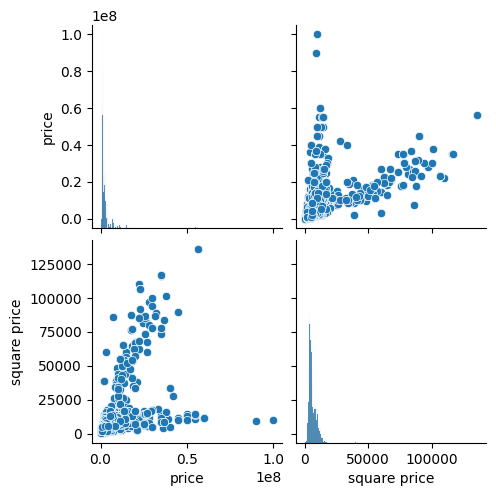

In [46]:
sns.pairplot(aqar[['price', 'square price']])

<Axes: >

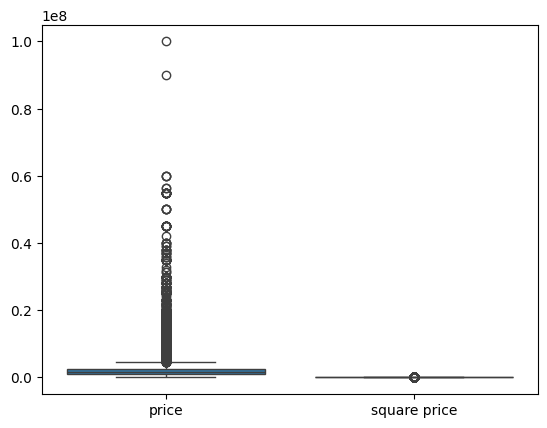

In [47]:
sns.boxplot(aqar[['price', 'square price']])

In [48]:
def limits(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    print("Upper Bound:",upper)   
    print("Lower Bound:",lower)
    return upper, lower
    

print("price")
priceupper, pricelower = limits(aqar['price'])
print("--------------------")
print("square price")
squareupper, squarelower = limits(aqar['square price'])

price
Upper Bound: 4730000.0
Lower Bound: -950000.0
--------------------
square price
Upper Bound: 13200.0
Lower Bound: -1733.3333333333335


In [49]:
#droping the outliers the 
outliers = aqar[(aqar['price'] < pricelower) | (aqar['price'] > priceupper)]
aqar = aqar.drop(outliers.index)

outliers = aqar[(aqar['square price'] < squarelower) | (aqar['square price'] > squareupper)]
aqar = aqar.drop(outliers.index)

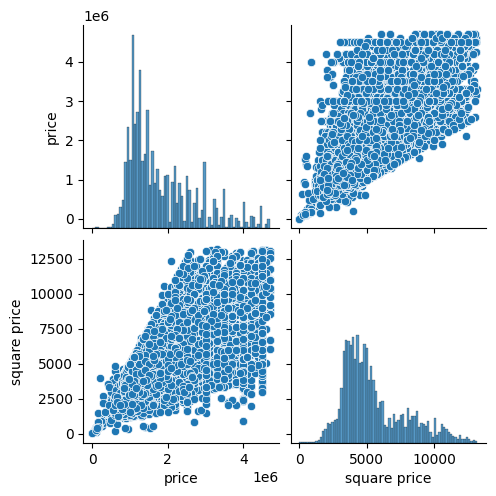

In [50]:
sns.pairplot(aqar[['price', 'square price']])

<Axes: >

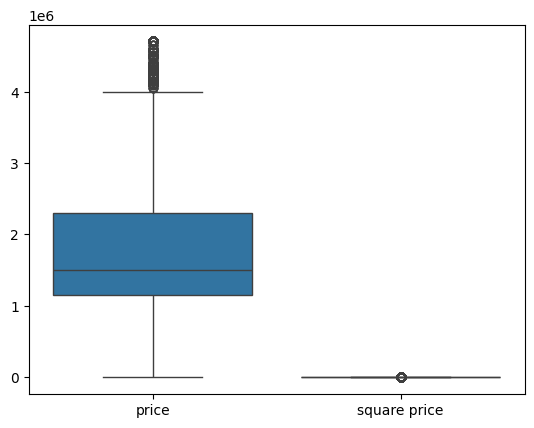

In [51]:
sns.boxplot(aqar[['price', 'square price']])

# Feature Engineering 

In [52]:
aqar['Area m2'] = aqar['price'] / aqar['square price']
aqar

front  rooms lounges bathrooms  streetWidth  stairs  propertyAge  \
0         E      5       4         5         20.0     1.0          0.0   
1         W      4       3         5         20.0     1.0          0.0   
2        SE      7       2         5         15.0     1.0         31.0   
3         W      7       3         5         15.0     1.0          3.0   
4         N      4       2         4         25.0     1.0          0.0   
...     ...    ...     ...       ...          ...     ...          ...   
46821     S      5       2         5         20.0     1.0          0.0   
46822     W      7       2         5         12.0     1.0          0.0   
46823     W      5       3         5         20.0     0.0          0.0   
46824    SW      1     NaN         1         15.0     0.0          0.0   
46825     N      6       2         5         15.0     1.0          0.0   

       driverRoom  tent  patio  kitchen  outdoorRoom  garage  duplex  space  \
0             1.0   1.0    1.0      1.0          1.0     1.0     1.0    300   
1             1.0   1.0    1.0      1.0          1.0     1.0     0.0    540   
2             1.0   0.0    1.0      1.0          1.0     1.0     0.0    875   
3             0.0   1.0    1.0      1.0          0.0     1.0     1.0    200   
4             1.0   1.0    1.0      1.0          1.0     1.0     0.0    400   
...           ...   ...    ...      ...          ...     ...     ...    ...   
46821         0.0   1.0    1.0      1.0          1.0     1.0     0.0    385   
46822         0.0   1.0    1.0      1.0          1.0     1.0     0.0    500   
46823         0.0   1.0    1.0      1.0          1.0     1.0     1.0    200   
46824         0.0   0.0    0.0      1.0          0.0     0.0     0.0    405   
46825         0.0   1.0    1.0      1.0          1.0     1.0     0.0    750   

      apartments  maidRoom  elevator  furnihsed  pool  basement neighbourhood  \
0              0       0.0       0.0        0.0   0.0       0.0          Okaz   
1              2       1.0       1.0        0.0   0.0       0.0   Al Mahdiyah   
2              0       1.0       0.0        0.0   0.0       0.0         الشفا   
3              0       1.0       0.0        1.0   0.0       0.0      ظهرة لبن   
4              3       1.0       1.0        1.0   0.0       0.0         قرطبة   
...          ...       ...       ...        ...   ...       ...           ...   
46821          1       1.0       1.0        0.0   0.0       0.0    Almunsiyah   
46822          0       1.0       0.0        0.0   0.0       0.0  ظهرة البديعة   
46823          0       1.0       0.0        0.0   0.0       0.0         Tuwik   
46824          2       0.0       0.0        0.0   0.0       0.0      Al Nahda   
46825          2       1.0       0.0        0.0   0.0       0.0    Almunsiyah   

      location      price  square price  Area m2  
0            S  1050000.0   3500.000000    300.0  
1            W  3000000.0   5555.555556    540.0  
2            S  2000000.0   2285.714286    875.0  
3            W   894000.0   4470.000000    200.0  
4            E  3500000.0   8750.000000    400.0  
...        ...        ...           ...      ...  
46821        E  2250000.0   5844.155844    385.0  
46822        W  1050000.0   2100.000000    500.0  
46823        W  1000000.0   5000.000000    200.0  
46824        E  2300000.0   5679.012346    405.0  
46825        E  4100000.0   5466.666667    750.0  

[43193 rows x 26 columns]

In [134]:
aqar.describe()

Unnamed: 0         rooms   streetWidth        stairs   propertyAge  \
count  43193.000000  43193.000000  43071.000000  43193.000000  43193.000000   
mean   25912.919848      4.663626     18.027884      0.674160      2.348390   
std    15001.073103      1.099805      3.990526      0.468693      6.444984   
min        0.000000      1.000000      1.000000      0.000000      0.000000   
25%    12916.000000      4.000000     15.000000      0.000000      0.000000   
50%    25893.000000      5.000000     19.000000      1.000000      0.000000   
75%    38926.000000      5.000000     20.000000      1.000000      0.000000   
max    51844.000000      7.000000    100.000000      1.000000     35.000000   

         driverRoom          tent         patio       kitchen   outdoorRoom  \
count  43193.000000  43193.000000  43193.000000  43193.000000  43193.000000   
mean       0.311046      0.483921      0.766374      0.978446      0.630843   
std        0.462927      0.499747      0.423142      0.145225      0.482582   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      1.000000      1.000000      0.000000   
50%        0.000000      0.000000      1.000000      1.000000      1.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             garage        duplex         space      maidRoom      elevator  \
count  43193.000000  43193.000000  43193.000000  43193.000000  43193.000000   
mean       0.905633      0.318686    343.868567      0.753131      0.197625   
std        0.292342      0.465972    143.405265      0.431195      0.398212   
min        0.000000      0.000000     50.000000      0.000000      0.000000   
25%        1.000000      0.000000    270.000000      1.000000      0.000000   
50%        1.000000      0.000000    305.000000      1.000000      0.000000   
75%        1.000000      1.000000    375.000000      1.000000      0.000000   
max        1.000000      1.000000   4500.000000      1.000000      1.000000   

          furnihsed          pool      basement         price  square price  \
count  43193.000000  43193.000000  43193.000000  4.319100e+04  43191.000000   
mean       0.071933      0.076309      0.026648  1.829304e+06   5498.390094   
std        0.258380      0.265494      0.161054  9.045431e+05   2373.258334   
min        0.000000      0.000000      0.000000  1.080000e+03      3.428571   
25%        0.000000      0.000000      0.000000  1.150000e+06   3800.000000   
50%        0.000000      0.000000      0.000000  1.500000e+06   4833.333333   
75%        0.000000      0.000000      0.000000  2.300000e+06   6800.000000   
max        1.000000      1.000000      1.000000  4.700000e+06  13200.000000   

            Area m2  
count  43191.000000  
mean     343.865736  
std      143.407655  
min       50.000000  
25%      270.000000  
50%      305.000000  
75%      375.000000  
max     4500.000000

In [135]:
aqar

Unnamed: 0 front  rooms lounges bathrooms  streetWidth  stairs  \
0               0     E      5       4         5         20.0     1.0   
1               1     W      4       3         5         20.0     1.0   
2               2    SE      7       2         5         15.0     1.0   
3               3     W      7       3         5         15.0     1.0   
4               4     N      4       2         4         25.0     1.0   
...           ...   ...    ...     ...       ...          ...     ...   
46821       51840     S      5       2         5         20.0     1.0   
46822       51841     W      7       2         5         12.0     1.0   
46823       51842     W      5       3         5         20.0     0.0   
46824       51843    SW      1     NaN         1         15.0     0.0   
46825       51844     N      6       2         5         15.0     1.0   

       propertyAge  driverRoom  tent  patio  kitchen  outdoorRoom  garage  \
0              0.0         1.0   1.0    1.0      1.0          1.0     1.0   
1              0.0         1.0   1.0    1.0      1.0          1.0     1.0   
2             31.0         1.0   0.0    1.0      1.0          1.0     1.0   
3              3.0         0.0   1.0    1.0      1.0          0.0     1.0   
4              0.0         1.0   1.0    1.0      1.0          1.0     1.0   
...            ...         ...   ...    ...      ...          ...     ...   
46821          0.0         0.0   1.0    1.0      1.0          1.0     1.0   
46822          0.0         0.0   1.0    1.0      1.0          1.0     1.0   
46823          0.0         0.0   1.0    1.0      1.0          1.0     1.0   
46824          0.0         0.0   0.0    0.0      1.0          0.0     0.0   
46825          0.0         0.0   1.0    1.0      1.0          1.0     1.0   

       duplex  space apartments  maidRoom  elevator  furnihsed  pool  \
0         1.0    300          0       0.0       0.0        0.0   0.0   
1         0.0    540          2       1.0       1.0        0.0   0.0   
2         0.0    875          0       1.0       0.0        0.0   0.0   
3         1.0    200          0       1.0       0.0        1.0   0.0   
4         0.0    400          3       1.0       1.0        1.0   0.0   
...       ...    ...        ...       ...       ...        ...   ...   
46821     0.0    385        NaN       1.0       1.0        0.0   0.0   
46822     0.0    500        NaN       1.0       0.0        0.0   0.0   
46823     1.0    200        NaN       1.0       0.0        0.0   0.0   
46824     0.0    405        NaN       0.0       0.0        0.0   0.0   
46825     0.0    750        NaN       1.0       0.0        0.0   0.0   

       basement neighbourhood location      price  square price  Area m2  
0           0.0          Okaz        S  1050000.0   3500.000000    300.0  
1           0.0   Al Mahdiyah        W  3000000.0   5555.555556    540.0  
2           0.0         الشفا        S  2000000.0   2285.714286    875.0  
3           0.0      ظهرة لبن        W   894000.0   4470.000000    200.0  
4           0.0         قرطبة        E  3500000.0   8750.000000    400.0  
...         ...           ...      ...        ...           ...      ...  
46821       0.0    Almunsiyah        E  2250000.0   5844.155844    385.0  
46822       0.0  ظهرة البديعة        W  1050000.0   2100.000000    500.0  
46823       0.0         Tuwik        W  1000000.0   5000.000000    200.0  
46824       0.0      Al Nahda        E  2300000.0   5679.012346    405.0  
46825       0.0    Almunsiyah        E  4100000.0   5466.666667    750.0  

[43193 rows x 27 columns]

In [53]:
np.linspace(50, 4500, 4)

array([  50.        , 1533.33333333, 3016.66666667, 4500.        ])

In [54]:
def AreaGroup(x):
    if x >= 50 and x <= 400:
        return 'Normal'
    elif x > 400 and x <= 1533:
        return 'Large'
    elif x > 1533 and x <= 3016:
        return 'Huge'
    elif x > 3016:
        return 'Vast'
    
aqar['Area Rank'] = aqar['Area m2'].apply(AreaGroup)
aqar

front  rooms lounges bathrooms  streetWidth  stairs  propertyAge  \
0         E      5       4         5         20.0     1.0          0.0   
1         W      4       3         5         20.0     1.0          0.0   
2        SE      7       2         5         15.0     1.0         31.0   
3         W      7       3         5         15.0     1.0          3.0   
4         N      4       2         4         25.0     1.0          0.0   
...     ...    ...     ...       ...          ...     ...          ...   
46821     S      5       2         5         20.0     1.0          0.0   
46822     W      7       2         5         12.0     1.0          0.0   
46823     W      5       3         5         20.0     0.0          0.0   
46824    SW      1     NaN         1         15.0     0.0          0.0   
46825     N      6       2         5         15.0     1.0          0.0   

       driverRoom  tent  patio  kitchen  outdoorRoom  garage  duplex  space  \
0             1.0   1.0    1.0      1.0          1.0     1.0     1.0    300   
1             1.0   1.0    1.0      1.0          1.0     1.0     0.0    540   
2             1.0   0.0    1.0      1.0          1.0     1.0     0.0    875   
3             0.0   1.0    1.0      1.0          0.0     1.0     1.0    200   
4             1.0   1.0    1.0      1.0          1.0     1.0     0.0    400   
...           ...   ...    ...      ...          ...     ...     ...    ...   
46821         0.0   1.0    1.0      1.0          1.0     1.0     0.0    385   
46822         0.0   1.0    1.0      1.0          1.0     1.0     0.0    500   
46823         0.0   1.0    1.0      1.0          1.0     1.0     1.0    200   
46824         0.0   0.0    0.0      1.0          0.0     0.0     0.0    405   
46825         0.0   1.0    1.0      1.0          1.0     1.0     0.0    750   

      apartments  maidRoom  elevator  furnihsed  pool  basement neighbourhood  \
0              0       0.0       0.0        0.0   0.0       0.0          Okaz   
1              2       1.0       1.0        0.0   0.0       0.0   Al Mahdiyah   
2              0       1.0       0.0        0.0   0.0       0.0         الشفا   
3              0       1.0       0.0        1.0   0.0       0.0      ظهرة لبن   
4              3       1.0       1.0        1.0   0.0       0.0         قرطبة   
...          ...       ...       ...        ...   ...       ...           ...   
46821          1       1.0       1.0        0.0   0.0       0.0    Almunsiyah   
46822          0       1.0       0.0        0.0   0.0       0.0  ظهرة البديعة   
46823          0       1.0       0.0        0.0   0.0       0.0         Tuwik   
46824          2       0.0       0.0        0.0   0.0       0.0      Al Nahda   
46825          2       1.0       0.0        0.0   0.0       0.0    Almunsiyah   

      location      price  square price  Area m2 Area Rank  
0            S  1050000.0   3500.000000    300.0    Normal  
1            W  3000000.0   5555.555556    540.0     Large  
2            S  2000000.0   2285.714286    875.0     Large  
3            W   894000.0   4470.000000    200.0    Normal  
4            E  3500000.0   8750.000000    400.0    Normal  
...        ...        ...           ...      ...       ...  
46821        E  2250000.0   5844.155844    385.0    Normal  
46822        W  1050000.0   2100.000000    500.0     Large  
46823        W  1000000.0   5000.000000    200.0    Normal  
46824        E  2300000.0   5679.012346    405.0     Large  
46825        E  4100000.0   5466.666667    750.0     Large  

[43193 rows x 27 columns]

# Missing data handeling 

In [55]:
aqar.isnull().sum()/len(aqar) *100

front            0.000000
rooms            0.000000
lounges          2.359179
bathrooms        0.000000
streetWidth      0.282453
stairs           0.000000
propertyAge      0.000000
driverRoom       0.000000
tent             0.000000
patio            0.000000
kitchen          0.000000
outdoorRoom      0.000000
garage           0.000000
duplex           0.000000
space            0.000000
apartments       0.000000
maidRoom         0.000000
elevator         0.000000
furnihsed        0.000000
pool             0.000000
basement         0.000000
neighbourhood    0.000000
location         0.000000
price            0.004630
square price     0.004630
Area m2          0.004630
Area Rank        0.004630
dtype: float64

In [56]:
aqar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43193 entries, 0 to 46825
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   front          43193 non-null  object 
 1   rooms          43193 non-null  int64  
 2   lounges        42174 non-null  object 
 3   bathrooms      43193 non-null  object 
 4   streetWidth    43071 non-null  float64
 5   stairs         43193 non-null  float64
 6   propertyAge    43193 non-null  float64
 7   driverRoom     43193 non-null  float64
 8   tent           43193 non-null  float64
 9   patio          43193 non-null  float64
 10  kitchen        43193 non-null  float64
 11  outdoorRoom    43193 non-null  float64
 12  garage         43193 non-null  float64
 13  duplex         43193 non-null  float64
 14  space          43193 non-null  int64  
 15  apartments     43193 non-null  object 
 16  maidRoom       43193 non-null  float64
 17  elevator       43193 non-null  float64
 18  furnihsed  

In [57]:
aqar['lounges'] = aqar['lounges'].astype('Int64')
meanlist = aqar.groupby('Area Rank')['lounges'].mean()
meanlist

Area Rank
Huge           3.0
Large     2.406761
Normal    2.326629
Vast           1.6
Name: lounges, dtype: Float64

In [58]:
def fun(x, y):
    if pd.isnull(y):
        for i in meanlist.index:
            if i == x:
                return meanlist[x]
    else: 
        return y

aqar['lounges'] = list(map(fun, aqar['Area Rank'], aqar['lounges']))

aqar.isnull().sum()/len(aqar) *100

front            0.000000
rooms            0.000000
lounges          0.000000
bathrooms        0.000000
streetWidth      0.282453
stairs           0.000000
propertyAge      0.000000
driverRoom       0.000000
tent             0.000000
patio            0.000000
kitchen          0.000000
outdoorRoom      0.000000
garage           0.000000
duplex           0.000000
space            0.000000
apartments       0.000000
maidRoom         0.000000
elevator         0.000000
furnihsed        0.000000
pool             0.000000
basement         0.000000
neighbourhood    0.000000
location         0.000000
price            0.004630
square price     0.004630
Area m2          0.004630
Area Rank        0.004630
dtype: float64

In [59]:
aqar['apartments'].value_counts()

apartments
0     23838
1      9156
2      8181
3      1571
4       369
5        26
6        12
8         7
7         7
15        5
10        4
12        3
11        3
14        3
30        2
13        2
20        2
9         1
16        1
Name: count, dtype: int64

In [60]:
aqar['lounges'] = aqar['lounges'].astype('int64')
aqar

front  rooms  lounges bathrooms  streetWidth  stairs  propertyAge  \
0         E      5        4         5         20.0     1.0          0.0   
1         W      4        3         5         20.0     1.0          0.0   
2        SE      7        2         5         15.0     1.0         31.0   
3         W      7        3         5         15.0     1.0          3.0   
4         N      4        2         4         25.0     1.0          0.0   
...     ...    ...      ...       ...          ...     ...          ...   
46821     S      5        2         5         20.0     1.0          0.0   
46822     W      7        2         5         12.0     1.0          0.0   
46823     W      5        3         5         20.0     0.0          0.0   
46824    SW      1        2         1         15.0     0.0          0.0   
46825     N      6        2         5         15.0     1.0          0.0   

       driverRoom  tent  patio  kitchen  outdoorRoom  garage  duplex  space  \
0             1.0   1.0    1.0      1.0          1.0     1.0     1.0    300   
1             1.0   1.0    1.0      1.0          1.0     1.0     0.0    540   
2             1.0   0.0    1.0      1.0          1.0     1.0     0.0    875   
3             0.0   1.0    1.0      1.0          0.0     1.0     1.0    200   
4             1.0   1.0    1.0      1.0          1.0     1.0     0.0    400   
...           ...   ...    ...      ...          ...     ...     ...    ...   
46821         0.0   1.0    1.0      1.0          1.0     1.0     0.0    385   
46822         0.0   1.0    1.0      1.0          1.0     1.0     0.0    500   
46823         0.0   1.0    1.0      1.0          1.0     1.0     1.0    200   
46824         0.0   0.0    0.0      1.0          0.0     0.0     0.0    405   
46825         0.0   1.0    1.0      1.0          1.0     1.0     0.0    750   

      apartments  maidRoom  elevator  furnihsed  pool  basement neighbourhood  \
0              0       0.0       0.0        0.0   0.0       0.0          Okaz   
1              2       1.0       1.0        0.0   0.0       0.0   Al Mahdiyah   
2              0       1.0       0.0        0.0   0.0       0.0         الشفا   
3              0       1.0       0.0        1.0   0.0       0.0      ظهرة لبن   
4              3       1.0       1.0        1.0   0.0       0.0         قرطبة   
...          ...       ...       ...        ...   ...       ...           ...   
46821          1       1.0       1.0        0.0   0.0       0.0    Almunsiyah   
46822          0       1.0       0.0        0.0   0.0       0.0  ظهرة البديعة   
46823          0       1.0       0.0        0.0   0.0       0.0         Tuwik   
46824          2       0.0       0.0        0.0   0.0       0.0      Al Nahda   
46825          2       1.0       0.0        0.0   0.0       0.0    Almunsiyah   

      location      price  square price  Area m2 Area Rank  
0            S  1050000.0   3500.000000    300.0    Normal  
1            W  3000000.0   5555.555556    540.0     Large  
2            S  2000000.0   2285.714286    875.0     Large  
3            W   894000.0   4470.000000    200.0    Normal  
4            E  3500000.0   8750.000000    400.0    Normal  
...        ...        ...           ...      ...       ...  
46821        E  2250000.0   5844.155844    385.0    Normal  
46822        W  1050000.0   2100.000000    500.0     Large  
46823        W  1000000.0   5000.000000    200.0    Normal  
46824        E  2300000.0   5679.012346    405.0     Large  
46825        E  4100000.0   5466.666667    750.0     Large  

[43193 rows x 27 columns]

In [61]:
meanlist = aqar.groupby('neighbourhood')['streetWidth'].mean()
meanlist

neighbourhood
Al Aarid       17.441778
Al Hazm        19.877447
Al Mahdiyah    19.819611
Al Malqa       16.668966
Al Nahda       15.887255
                 ...    
ميات            5.000000
نمار           18.065217
هجرة لبن       20.800000
وة بن شريح     15.000000
ويه            25.000000
Name: streetWidth, Length: 250, dtype: float64

In [62]:
aqar['streetWidth'] = list(map(fun, aqar['neighbourhood'], aqar['streetWidth']))
aqar.isnull().sum()/len(aqar) *100

front            0.000000
rooms            0.000000
lounges          0.000000
bathrooms        0.000000
streetWidth      0.002315
stairs           0.000000
propertyAge      0.000000
driverRoom       0.000000
tent             0.000000
patio            0.000000
kitchen          0.000000
outdoorRoom      0.000000
garage           0.000000
duplex           0.000000
space            0.000000
apartments       0.000000
maidRoom         0.000000
elevator         0.000000
furnihsed        0.000000
pool             0.000000
basement         0.000000
neighbourhood    0.000000
location         0.000000
price            0.004630
square price     0.004630
Area m2          0.004630
Area Rank        0.004630
dtype: float64

In [63]:
meanlist = aqar.groupby('neighbourhood')['square price'].mean()
aqar['square price'] = list(map(fun, aqar['neighbourhood'], aqar['square price']))
aqar.isnull().sum()/len(aqar) *100

front            0.000000
rooms            0.000000
lounges          0.000000
bathrooms        0.000000
streetWidth      0.002315
stairs           0.000000
propertyAge      0.000000
driverRoom       0.000000
tent             0.000000
patio            0.000000
kitchen          0.000000
outdoorRoom      0.000000
garage           0.000000
duplex           0.000000
space            0.000000
apartments       0.000000
maidRoom         0.000000
elevator         0.000000
furnihsed        0.000000
pool             0.000000
basement         0.000000
neighbourhood    0.000000
location         0.000000
price            0.004630
square price     0.000000
Area m2          0.004630
Area Rank        0.004630
dtype: float64

In [64]:
meanlist = aqar.groupby('neighbourhood')['price'].mean()
aqar['price'] = list(map(fun, aqar['neighbourhood'], aqar['price']))
aqar.isnull().sum()/len(aqar) *100

front            0.000000
rooms            0.000000
lounges          0.000000
bathrooms        0.000000
streetWidth      0.002315
stairs           0.000000
propertyAge      0.000000
driverRoom       0.000000
tent             0.000000
patio            0.000000
kitchen          0.000000
outdoorRoom      0.000000
garage           0.000000
duplex           0.000000
space            0.000000
apartments       0.000000
maidRoom         0.000000
elevator         0.000000
furnihsed        0.000000
pool             0.000000
basement         0.000000
neighbourhood    0.000000
location         0.000000
price            0.000000
square price     0.000000
Area m2          0.004630
Area Rank        0.004630
dtype: float64

In [65]:
aqar['Area m2'] = aqar['price'] / aqar['square price']
aqar.isnull().sum()/len(aqar) *100

front            0.000000
rooms            0.000000
lounges          0.000000
bathrooms        0.000000
streetWidth      0.002315
stairs           0.000000
propertyAge      0.000000
driverRoom       0.000000
tent             0.000000
patio            0.000000
kitchen          0.000000
outdoorRoom      0.000000
garage           0.000000
duplex           0.000000
space            0.000000
apartments       0.000000
maidRoom         0.000000
elevator         0.000000
furnihsed        0.000000
pool             0.000000
basement         0.000000
neighbourhood    0.000000
location         0.000000
price            0.000000
square price     0.000000
Area m2          0.000000
Area Rank        0.004630
dtype: float64

In [66]:
def AreaGroup(x):
    if x >= 50 and x <= 400:
        return 'Normal'
    elif x > 400 and x <= 1533:
        return 'Large'
    elif x > 1533 and x <= 3016:
        return 'Huge'
    elif x > 3016:
        return 'Vast'
    
aqar['Area Rank'] = aqar['Area m2'].apply(AreaGroup)
aqar.isnull().sum()/len(aqar) *100

front            0.000000
rooms            0.000000
lounges          0.000000
bathrooms        0.000000
streetWidth      0.002315
stairs           0.000000
propertyAge      0.000000
driverRoom       0.000000
tent             0.000000
patio            0.000000
kitchen          0.000000
outdoorRoom      0.000000
garage           0.000000
duplex           0.000000
space            0.000000
apartments       0.000000
maidRoom         0.000000
elevator         0.000000
furnihsed        0.000000
pool             0.000000
basement         0.000000
neighbourhood    0.000000
location         0.000000
price            0.000000
square price     0.000000
Area m2          0.000000
Area Rank        0.000000
dtype: float64

In [67]:
aqar['streetWidth'].fillna(0, inplace=True)
aqar.isnull().sum()/len(aqar) *100

front            0.0
rooms            0.0
lounges          0.0
bathrooms        0.0
streetWidth      0.0
stairs           0.0
propertyAge      0.0
driverRoom       0.0
tent             0.0
patio            0.0
kitchen          0.0
outdoorRoom      0.0
garage           0.0
duplex           0.0
space            0.0
apartments       0.0
maidRoom         0.0
elevator         0.0
furnihsed        0.0
pool             0.0
basement         0.0
neighbourhood    0.0
location         0.0
price            0.0
square price     0.0
Area m2          0.0
Area Rank        0.0
dtype: float64

In [150]:
aqar['apartments'].value_counts()

apartments
0     16779
1      6290
2      5603
3      1147
4       262
5        19
6         9
8         6
7         5
10        4
30        2
12        2
15        2
20        2
11        1
9         1
16        1
13        1
14        1
Name: count, dtype: int64

In [153]:
aqar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43193 entries, 0 to 46825
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   front          43193 non-null  object 
 1   rooms          43193 non-null  int64  
 2   lounges        43193 non-null  int64  
 3   bathrooms      43193 non-null  object 
 4   streetWidth    43193 non-null  float64
 5   stairs         43193 non-null  float64
 6   propertyAge    43193 non-null  float64
 7   driverRoom     43193 non-null  float64
 8   tent           43193 non-null  float64
 9   patio          43193 non-null  float64
 10  kitchen        43193 non-null  float64
 11  outdoorRoom    43193 non-null  float64
 12  garage         43193 non-null  float64
 13  duplex         43193 non-null  float64
 14  space          43193 non-null  int64  
 15  apartments     30137 non-null  object 
 16  maidRoom       43193 non-null  float64
 17  elevator       43193 non-null  float64
 18  furnihsed  

#  Top 10 and Top 5
___

In [68]:
top10=[]
for i in range(10):
    top10.append(aqar['neighbourhood'].value_counts().index[:10][i])
top10

['Tuwik',
 'Ar Rimal',
 'Okaz',
 'Bader',
 'An Narjis',
 'Al Aarid',
 'Almunsiyah',
 'Al Mahdiyah',
 'Al Hazm',
 'Al Nahda']

In [69]:
t10=aqar.loc[aqar['neighbourhood'].isin(top10)]
t10

front  rooms  lounges bathrooms  streetWidth  stairs  propertyAge  \
0         E      5        4         5         20.0     1.0          0.0   
1         W      4        3         5         20.0     1.0          0.0   
6         N      6        2         5         20.0     1.0          0.0   
7         N      7        3         5         25.0     1.0          6.0   
9        NE      5        5         5         22.0     1.0          0.0   
...     ...    ...      ...       ...          ...     ...          ...   
46820     S      1        2         3         15.0     1.0          0.0   
46821     S      5        2         5         20.0     1.0          0.0   
46823     W      5        3         5         20.0     0.0          0.0   
46824    SW      1        2         1         15.0     0.0          0.0   
46825     N      6        2         5         15.0     1.0          0.0   

       driverRoom  tent  patio  kitchen  outdoorRoom  garage  duplex  space  \
0             1.0   1.0    1.0      1.0          1.0     1.0     1.0    300   
1             1.0   1.0    1.0      1.0          1.0     1.0     0.0    540   
6             0.0   1.0    1.0      1.0          1.0     1.0     1.0    275   
7             0.0   1.0    1.0      1.0          1.0     1.0     1.0    300   
9             0.0   0.0    1.0      1.0          1.0     1.0     0.0    360   
...           ...   ...    ...      ...          ...     ...     ...    ...   
46820         1.0   1.0    0.0      1.0          1.0     1.0     0.0    360   
46821         0.0   1.0    1.0      1.0          1.0     1.0     0.0    385   
46823         0.0   1.0    1.0      1.0          1.0     1.0     1.0    200   
46824         0.0   0.0    0.0      1.0          0.0     0.0     0.0    405   
46825         0.0   1.0    1.0      1.0          1.0     1.0     0.0    750   

      apartments  maidRoom  elevator  furnihsed  pool  basement neighbourhood  \
0              0       0.0       0.0        0.0   0.0       0.0          Okaz   
1              2       1.0       1.0        0.0   0.0       0.0   Al Mahdiyah   
6              0       0.0       1.0        0.0   0.0       0.0   Al Mahdiyah   
7              0       1.0       0.0        0.0   0.0       0.0          Okaz   
9              0       1.0       0.0        0.0   0.0       0.0          Okaz   
...          ...       ...       ...        ...   ...       ...           ...   
46820          0       1.0       0.0        1.0   0.0       0.0      Al Nahda   
46821          1       1.0       1.0        0.0   0.0       0.0    Almunsiyah   
46823          0       1.0       0.0        0.0   0.0       0.0         Tuwik   
46824          2       0.0       0.0        0.0   0.0       0.0      Al Nahda   
46825          2       1.0       0.0        0.0   0.0       0.0    Almunsiyah   

      location      price  square price  Area m2 Area Rank  
0            S  1050000.0   3500.000000    300.0    Normal  
1            W  3000000.0   5555.555556    540.0     Large  
6            W  2100000.0   7636.363636    275.0    Normal  
7            S  1100000.0   3666.666667    300.0    Normal  
9            S  1200000.0   3333.333333    360.0    Normal  
...        ...        ...           ...      ...       ...  
46820        E  2200000.0   6111.111111    360.0    Normal  
46821        E  2250000.0   5844.155844    385.0    Normal  
46823        W  1000000.0   5000.000000    200.0    Normal  
46824        E  2300000.0   5679.012346    405.0     Large  
46825        E  4100000.0   5466.666667    750.0     Large  

[28460 rows x 27 columns]

In [70]:
t5=t10.loc[t10['neighbourhood'].isin(top10[:5])]
t5

front  rooms  lounges bathrooms  streetWidth  stairs  propertyAge  \
0         E      5        4         5         20.0     1.0          0.0   
7         N      7        3         5         25.0     1.0          6.0   
9        NE      5        5         5         22.0     1.0          0.0   
11        S      5        4         5         21.0     1.0          0.0   
14       NE      5        3         5         21.0     1.0          0.0   
...     ...    ...      ...       ...          ...     ...          ...   
46813     E      5        3         5         20.0     1.0          0.0   
46816     E      5        1         5         20.0     1.0          0.0   
46818     N      5        3         5         15.0     0.0          3.0   
46819     W      4        2         5         20.0     1.0          7.0   
46823     W      5        3         5         20.0     0.0          0.0   

       driverRoom  tent  patio  kitchen  outdoorRoom  garage  duplex  space  \
0             1.0   1.0    1.0      1.0          1.0     1.0     1.0    300   
7             0.0   1.0    1.0      1.0          1.0     1.0     1.0    300   
9             0.0   0.0    1.0      1.0          1.0     1.0     0.0    360   
11            0.0   1.0    1.0      1.0          1.0     1.0     1.0    300   
14            0.0   0.0    1.0      1.0          1.0     1.0     0.0    260   
...           ...   ...    ...      ...          ...     ...     ...    ...   
46813         0.0   1.0    1.0      1.0          1.0     0.0     1.0    250   
46816         1.0   1.0    1.0      1.0          1.0     1.0     0.0    360   
46818         1.0   1.0    0.0      0.0          1.0     0.0     0.0    372   
46819         0.0   1.0    1.0      1.0          1.0     1.0     0.0    360   
46823         0.0   1.0    1.0      1.0          1.0     1.0     1.0    200   

      apartments  maidRoom  elevator  furnihsed  pool  basement neighbourhood  \
0              0       0.0       0.0        0.0   0.0       0.0          Okaz   
7              0       1.0       0.0        0.0   0.0       0.0          Okaz   
9              0       1.0       0.0        0.0   0.0       0.0          Okaz   
11             0       0.0       0.0        0.0   0.0       0.0         Bader   
14             0       0.0       0.0        0.0   0.0       0.0          Okaz   
...          ...       ...       ...        ...   ...       ...           ...   
46813          0       1.0       0.0        0.0   0.0       0.0         Bader   
46816          2       1.0       0.0        1.0   0.0       0.0         Tuwik   
46818          3       1.0       0.0        0.0   0.0       0.0      Ar Rimal   
46819          2       0.0       0.0        0.0   1.0       0.0         Tuwik   
46823          0       1.0       0.0        0.0   0.0       0.0         Tuwik   

      location      price  square price  Area m2 Area Rank  
0            S  1050000.0   3500.000000    300.0    Normal  
7            S  1100000.0   3666.666667    300.0    Normal  
9            S  1200000.0   3333.333333    360.0    Normal  
11           S  1050000.0   3500.000000    300.0    Normal  
14           S  1030000.0   3961.538462    260.0    Normal  
...        ...        ...           ...      ...       ...  
46813        S   980000.0   3920.000000    250.0    Normal  
46816        W  1500000.0   4166.666667    360.0    Normal  
46818        E  1420000.0   3817.204301    372.0    Normal  
46819        W  1350000.0   3750.000000    360.0    Normal  
46823        W  1000000.0   5000.000000    200.0    Normal  

[20778 rows x 27 columns]

# data visulization

In [178]:
t5[t5['neighbourhood']=='An Narjis'].sort_values(by='price',ascending=False)

front  rooms  lounges bathrooms  streetWidth  stairs  propertyAge  \
27182     N      7        3         5         20.0     1.0          0.0   
4551      W      5        3         5         15.0     1.0          0.0   
6839      E      4        4         4         24.0     0.0          0.0   
32202     E      4        4         4         24.0     0.0          0.0   
6420      S      5        2         5         15.0     1.0          0.0   
...     ...    ...      ...       ...          ...     ...          ...   
8335      W      5        3         4         20.0     1.0          5.0   
1832      W      5        1         4         20.0     1.0          5.0   
1524      W      5        2         5         20.0     1.0          5.0   
23248     N      5        2         5         15.0     0.0          4.0   
23025     N      5        2         4         15.0     1.0          0.0   

       driverRoom  tent  patio  kitchen  outdoorRoom  garage  duplex  space  \
27182         0.0   0.0    0.0      1.0          0.0     0.0     0.0    480   
4551          1.0   0.0    1.0      1.0          1.0     1.0     0.0    510   
6839          1.0   1.0    1.0      1.0          1.0     1.0     0.0    400   
32202         1.0   1.0    1.0      1.0          1.0     1.0     0.0    400   
6420          1.0   1.0    1.0      1.0          1.0     1.0     0.0    530   
...           ...   ...    ...      ...          ...     ...     ...    ...   
8335          1.0   0.0    1.0      1.0          1.0     1.0     0.0    225   
1832          0.0   0.0    1.0      1.0          0.0     1.0     1.0    225   
1524          0.0   0.0    1.0      1.0          0.0     1.0     1.0    225   
23248         0.0   0.0    0.0      1.0          0.0     1.0     1.0    225   
23025         1.0   0.0    0.0      1.0          0.0     1.0     0.0    416   

      apartments  maidRoom  elevator  furnihsed  pool  basement neighbourhood  \
27182          0       1.0       1.0        0.0   1.0       0.0     An Narjis   
4551           2       1.0       0.0        0.0   0.0       0.0     An Narjis   
6839           0       1.0       1.0        1.0   0.0       0.0     An Narjis   
32202          0       1.0       1.0        1.0   0.0       0.0     An Narjis   
6420           1       1.0       1.0        0.0   0.0       0.0     An Narjis   
...          ...       ...       ...        ...   ...       ...           ...   
8335           0       1.0       0.0        0.0   0.0       0.0     An Narjis   
1832           0       1.0       0.0        0.0   0.0       0.0     An Narjis   
1524           0       0.0       0.0        0.0   0.0       0.0     An Narjis   
23248          0       0.0       0.0        0.0   0.0       0.0     An Narjis   
23025          1       1.0       1.0        0.0   0.0       0.0     An Narjis   

      location      price  square price  Area m2 Area Rank  
27182        N  4700000.0   9791.666667    480.0     Large  
4551         N  4700000.0   9215.686275    510.0     Large  
6839         N  4700000.0  11750.000000    400.0    Normal  
32202        N  4700000.0  11750.000000    400.0    Normal  
6420         N  4700000.0   8867.924528    530.0     Large  
...        ...        ...           ...      ...       ...  
8335         N  1800000.0   8000.000000    225.0    Normal  
1832         N  1800000.0   8000.000000    225.0    Normal  
1524         N  1800000.0   8000.000000    225.0    Normal  
23248        N  1700000.0   7555.555556    225.0    Normal  
23025        N   300000.0    721.153846    416.0     Large  

[2686 rows x 27 columns]

<BarContainer object of 28460 artists>

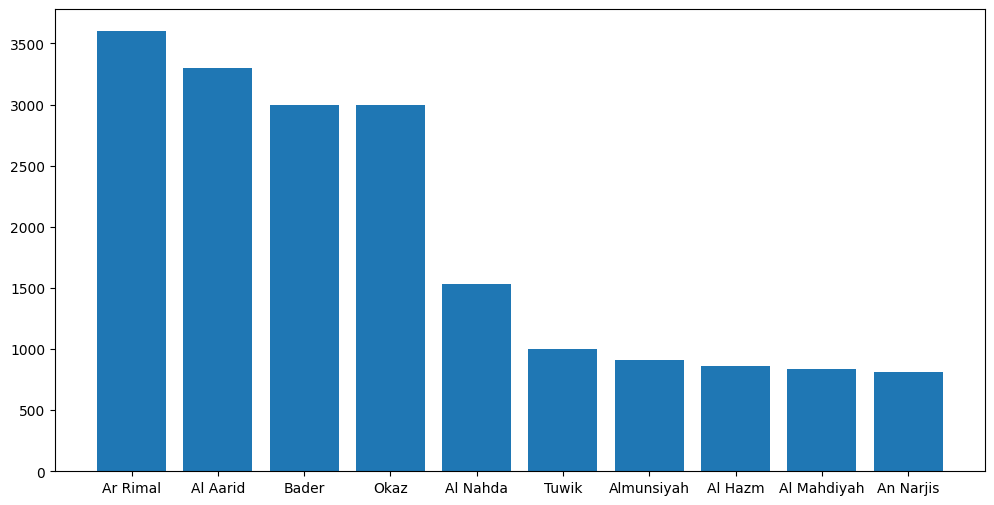

In [162]:
plt.figure(figsize=(12, 6))
tt10=t10.sort_values(by='space',ascending=False)
plt.bar(data=tt10,x='neighbourhood',height='space')
plt.show()

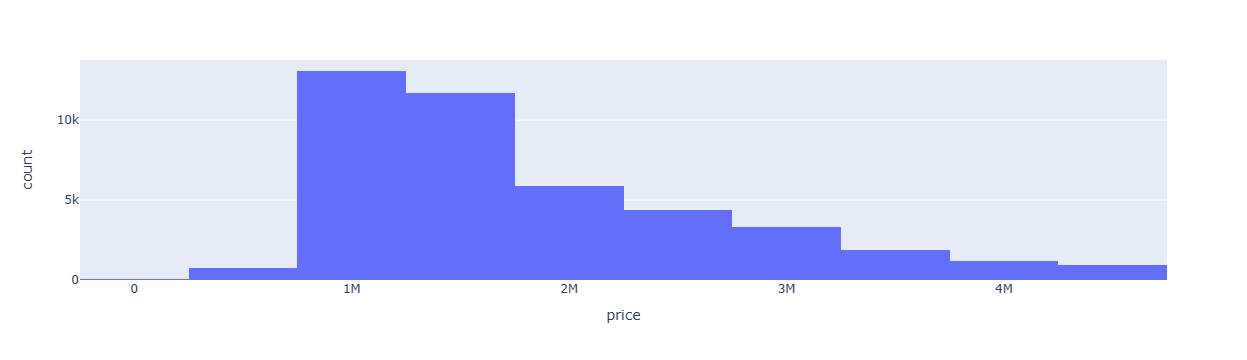

In [119]:
fig = px.histogram(aqar, x='price',nbins=20)
fig.show()

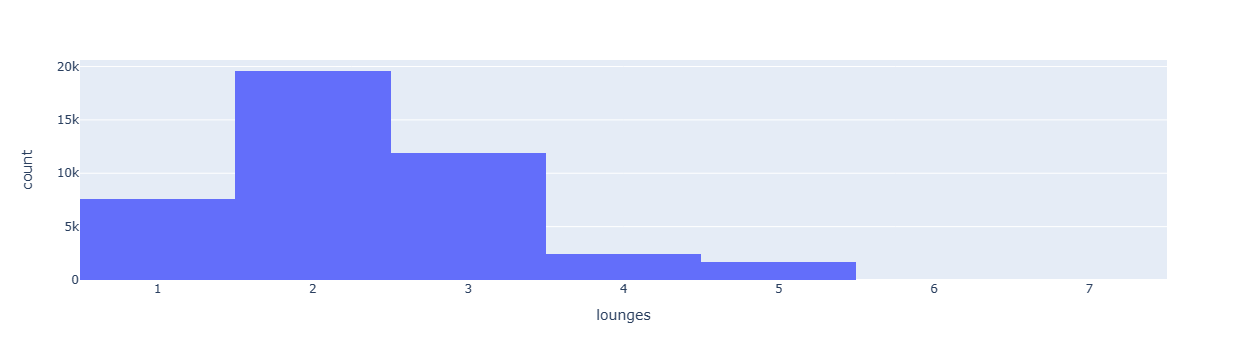

In [163]:
fig = px.histogram(aqar, x='lounges')
fig.show()

# 2 insights for hist to this code ↙
```python
fig = px.histogram(t10, x='lounges')
fig.show()
```
#### 1. Most of the villas have 2 lounges
#### 2. It's clear that Not being satisfied with one lounge in the villa 

<Axes: xlabel='neighbourhood', ylabel='count'>

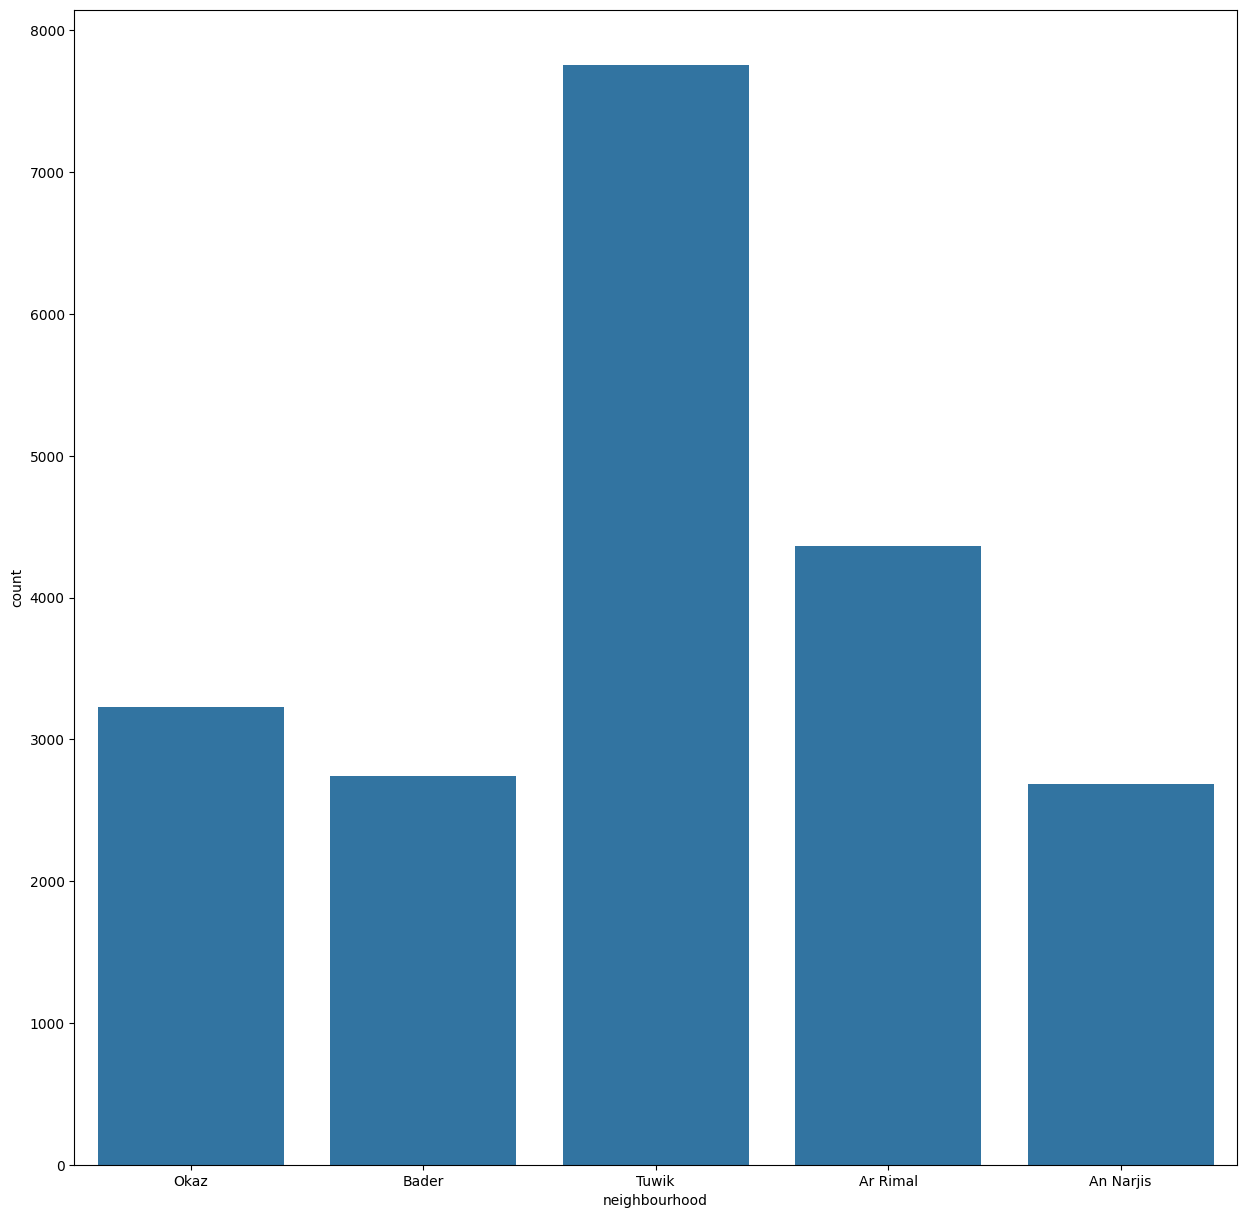

In [193]:
plt.figure(figsize=(15,15))
sns.countplot(data=t5, x='neighbourhood')


# 2 insights
#### 1. Resorting to larger buildings and their presence in the top 5 neighborhoods found in the data
#### 2. Al-Narjis neighborhood is the most expensive of the four neighborhoods

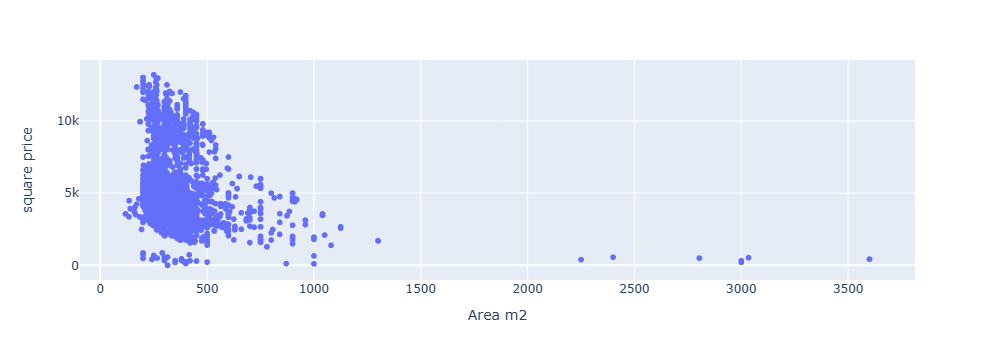

In [109]:
fig=px.scatter(t5,x='Area m2',y='square price')
fig.show()

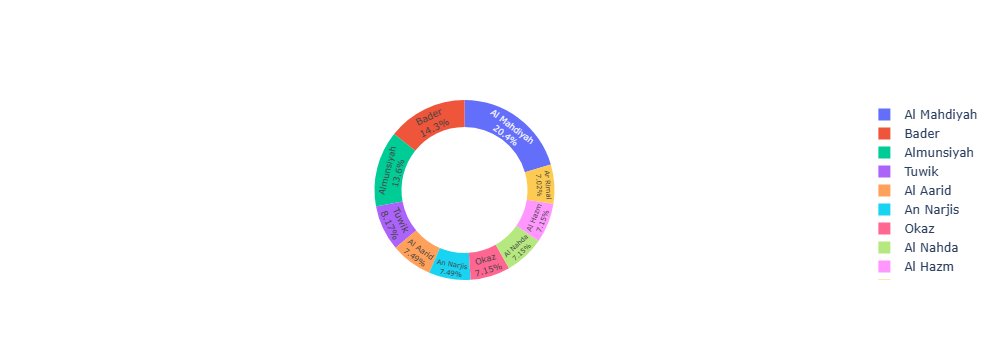

In [78]:
labels = list(t10['neighbourhood'].unique())
values = list(t10['price'])

fig = go.Figure(data=[go.Pie(labels=labels , values=values, hole=.7)])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Need To look 

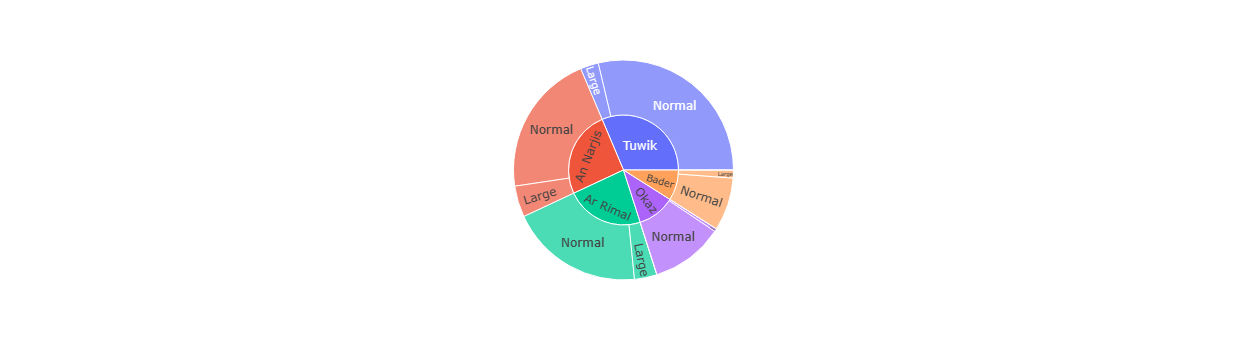

In [82]:
fig = px.sunburst(t5, path=['neighbourhood', 'Area Rank'], values='price')
fig.show()

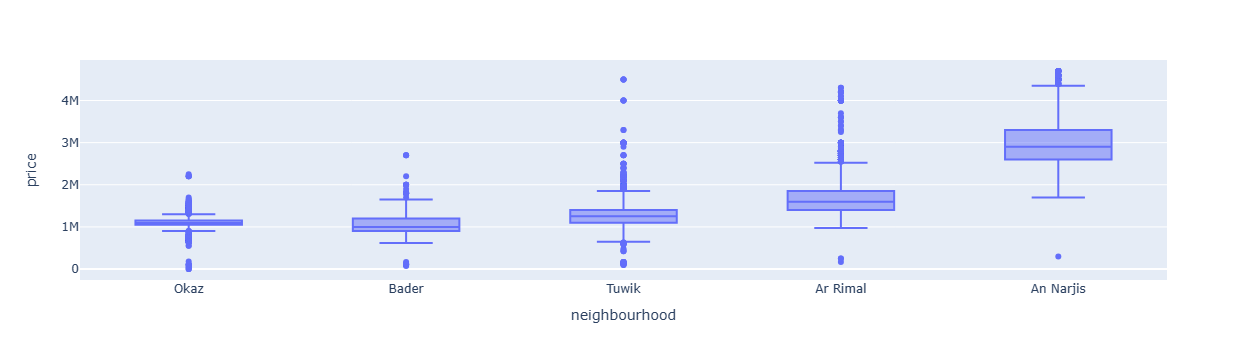

In [96]:
px.box(t5, x='neighbourhood', y='price')

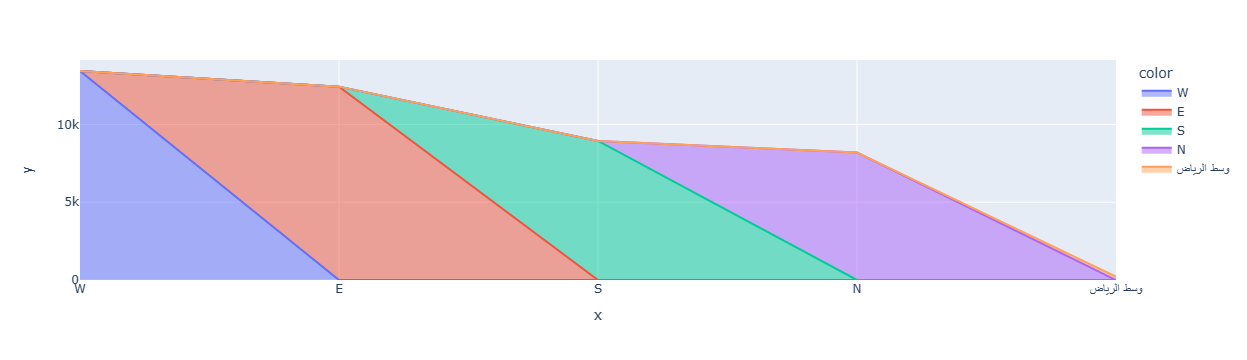

In [202]:
px.area( x=aqar['location'].value_counts().index,y=aqar['location'].value_counts().values,color=aqar['location'].value_counts().index)